<center><font size = "10"> Week 4 - Ion Channels <center>
<center><font size = "8">Home work SOLUTIONS<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:

# Ex1. Extracting parameters from experimental data

<font size=5>

You have been provided with a .nwb file (pottasium_ion_channel_rCell8600.nwb) describing measurements of a potassium channel.
The Activiation protocol contains current traces for an ion channel voltage clamped at potentials between -90 mV and +80 mV, at 10mV intervals.

Plot each of the traces and inspect them.
For each trace identify the maximum current $I_{max}$ and the activation time constant $ \tau_m $.
You can find $\tau_m$ at each potential value by fitting an exponential function $ y = a + b e^{\frac{-x}{\tau_{m}}} $ to the activation curve.
Fit each trace between some start time of your choice (choose carefully) and the point of maximum ionic current.

    
Finally, plot $tau_m$ and $I_k$ against membrane potential (on separate axes). How do they vary with voltage? What does this mean for the behavior of the channel?

[2 pts]



Marking: 
    
0.5 point for realising to start from 100ms, 
0.5 point for finding a good explonential function to fit all data, given that in some cases the curves for the first 
pulses can't be fitted with the exponential function of the tutorial.
0.5 points for plotting the traces
0.5 for plotting I_k and tau_m, recognizing that the channel becomes more active and activates more quickly when the cell is depolarized.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import h5py
from scipy.optimize import leastsq
import math
import matplotlib.cm as cm

def plotDataFiles(nwbFile, protocolName, repID):
    
    taus = []
    # Open the file
    open_data = h5py.File(nwbFile, 'r')
    # Select what we need for ploting
    string_data = '/acquisition/timeseries/'+ protocolName + '/repetitions/repetition' + repID +'/data'
    string_xinterval = '/acquisition/timeseries/'+ protocolName + '/repetitions/repetition' + repID +'/x_interval'
    string_xstart = '/acquisition/timeseries/'+ protocolName + '/repetitions/repetition' + repID +'/x_start'
  
    # save to a different variables
    data = open_data[(string_data)]
    x_interval = open_data[(string_xinterval)]
    x_start = open_data[(string_xstart)]
    
    # create time vector in ms
    nRow, nCol = data.shape
    x_end = x_start[0] + x_interval[0]*(float(nRow - 1))
    time = np.linspace(x_start[0], x_end, nRow) * 1000
    
    
    # plot the traces to see at what time point to start fitting data to exponential
    plt.figure()
    plt.title('%s protocol' %protocolName)
    plt.ylabel('curent trace (pA)')
    plt.xlabel('time (ms)')
    plt.plot(time, data, 'b')
    plt.show()  
    
    data_t = np.transpose(data)
    i = 0
    pot= - 90
    popt = None
    potentials = []
    currents = []
    a = []
    b = []
    for trace in data_t:                      
            maximum = max(trace) #get the maximum amplitude
            
            #Find the indecies where time is 100ms and the amplitude is max           
            index1 = np.where(time==[100.0])  #at which we have 100ms
            index2 = np.where(trace==maximum) #at which the amplitude is max 
            
            #Get integer numbers
            fl_arr1 = np.asarray(index1).flatten() #create arrays from index1 and index2     
            fl_arr2 = np.asarray(index2).flatten() 
            i1 = int(np.asarray(fl_arr1[0]))       #extract integers
            i2 = int(np.asarray(fl_arr2[0]))       
            
            #Select in the time array only the values between 100ms and the max amplitude
            x_data = time[i1:i2] 
            x_data = x_data.flatten()      #convert the ndarray to a 1D array
            x_data=x_data-100              #each element of time array updated to have a scale from 0 to x and better fitting
            x_data = pd.Series(x_data)     #convert the 1D array to pandas.core.series (type needed by curve fit in the exp)
            
            #Select in the trace array only the values between 100ms and the max amplitude
            y_data = trace[i1:i2]
            y_data = y_data.flatten()      
            y_data = pd.Series(y_data)
            
            #print number of the trace and voltage applied
            j = str(i+1)
            potential = str(pot)
            print('This is trace # : '+j+' with voltage : '+potential+' mV')
            potentials.append(pot)
            currents.append(maximum)
            if len(x_data) != 0 and len(y_data) != 0:
                popt = curveFittingSingleExp(x_data,y_data, p0=popt)
                a.append(popt[1])
                b.append(popt[2])
                taus.append(popt[0]) # it returns the tau value
                                                                  # it creates a list with tau values from all traces
            else: # data is empty, just append nan
                a.append(np.nan)
                b.append(np.nan)
                taus.append(np.nan)
                
            i = i+1
            pot = pot+10
    
    return potentials, taus, a, b, currents


# Function for exponential fitting
def func_expi(x, tau, a, b):

    return (a + b * np.exp(-x/tau))

def curveFittingSingleExp(x_data,y_data, p0=None):
    popt, pcov = curve_fit(func_expi, x_data, y_data, p0=p0)
    perr = np.sqrt(np.diag(pcov))
    plt.figure() #figsize=(10,6))
    plt.plot(x_data, y_data, 'xk', label='original data' )
    plt.plot(x_data, func_expi(x_data, popt[0],popt[1],popt[2]), '-r',label='fit: tau=%.3f, error=%.3f' %(popt[0],perr[0]))
    plt.legend()
    plt.show()
    
    return popt  # it returns the tau value



In [2]:
fileName2 = 'Data_files/rCell8600.nwb'
potentials, taus, a, b, currents = plotDataFiles(fileName2, 'Activation', '1')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'Data_files/rCell8600.nwb', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
plt.plot(potentials,taus)
plt.xlim([-100, 100])
plt.title('channel time constant VS clamped voltage stimulation')
plt.ylabel('Tau (ms)')
plt.xlabel('V (mV)')
plt.show()


NameError: name 'potentials' is not defined

In [4]:
plt.plot(potentials, currents)
plt.ylabel("I (mA)")
plt.xlabel("V (mV)")

NameError: name 'potentials' is not defined

# Ex2. Implementing a Potassium channel

<font size=5>

See `SKv3.1.mod`. Your task is to fill it in to implement the following potassium channel model:

$I_K = g_k \times (v - E_k)$
    
Where $I_k$ is potassium current, v is membrane potential, $g_k$ the potassium conductance, and $E_k$ is the reversal potential of potassium (provided for you within the NEURON simulator).

Note: to use the file you will need to copy it into the parent directory once it is ready. The !nrnivmodl command below will fail if the file is not present in the parent directory or the file has errors.

$g_k = \bar{g_k} \times m $
    
Where $\bar{g_k}$ is the maximum potassium conductance and m evolves according to the differential equation:

$m' = \frac{(m_{inf} - m)}{\tau_m}$

$m_{inf} = \frac{1}{1 + e^{\frac{v - v_{half}}{ s_m}}}$
    
$\tau_m = \frac{c_{\tau}}{1 + e^{\frac{v - v_{\tau}}{s_{\tau}}}} $
    
With some values fixed:
    
$s_m = -9.7$
    
$c_{\tau} = 4$
    
$\bar{g_k} = 0.0001 Scm^{-2}$

$v_{\tau} =  -46.560 V$
    
$s_{\tau} = -44$

The remaining parameter, $v_{half}$ we will vary.
    
Next, Create a cell in Neuron with the following characteristics: 
    
 - 1 section (soma) with one segment 15 µm of length and diameter, 
 - 120 Ω*cm of axial radius and 
 - 1.6 µF/cm^2 of capacitance. 
    
Insert the channel you just created.
Add a current clamp stimulus starting at 100ms and lasting 500ms.
    
Vary vhalf for to the values -30, -20, -10, 0, 10, 20. 
For each value of vhalf, vary stimulus amplitude between 0 and 1.5.
Record the maximum membrane potential and potassium conductance for each.
    
plot the I/V curves for each v_half on the same axes. 
explain the meaning of the results.

[2 pts]
    
Marking: 
    1 pts for entering the correct equations into the modfile
    0.5 for correctly plotting I/V curves
    0.5 pts for showing that modifying the half-value of the conductance shifts the switch from open to closed to different potentials.

In [5]:
!nrnivmodl

/Users/wesleymonteith/miniconda3/envs/biophysics/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/usr/bin/xcrun
/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 3
Mod files: "./Ca.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created x86_64/special


In [6]:
from neuron import h
from tqdm import tqdm
h.load_file('stdrun.hoc')

--No graphics will be displayed.


1.0

In [7]:
soma = h.Section()
soma.L = 18.0     # length (µm)
soma.diam = 18.0  # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.nseg = 1
soma.cm = 20
soma.insert('pas') # passive leakage
soma.insert("SKv3_1")



ValueError: argument not a density mechanism name.

In [8]:
# Inject a current step into the soma
stim = h.IClamp(soma(0.5))         # Place a stimulation electrode in the middle of the soma
stim.delay = 100   # stim delay (ms)
stim.amp = 0.6   # stim amplitude (nA)
stim.dur = 500     # stim duration (ms)

In [9]:
ik = h.Vector()
ik.record(soma(0.5)._ref_ik)
v = h.Vector()
v.record(soma(0.5)._ref_v)
t = h.Vector()
t.record(h._ref_t)


for vhalf in tqdm([-30, -20, -10, 0, 10, 20]):
    vmax = []
    imax = []
    for amp in np.linspace(0, 1.4, 20):
        for sec in soma:
            sec.SKv3_1.v_half = vhalf
            sec.SKv3_1.slope_tau = 4
        stim.amp = amp
        h.finitialize(-70)
        h.continuerun(700)
        vmax.append(np.array(v).max())
        imax.append(np.array(ik).max())
    plt.plot(vmax, imax)

plt.show()



AttributeError: ik, the mechanism does not exist at __nrnsec_0x7f94dff79000(0.5)

# Ex3. Finding the rheobase (minimal current needed to elicit an action potential) of a cell

<font size = "3">Create a cell in Neuron with the following characteristics: 
    
 - 1 section (soma) with one segment 15 µm of length and diameter, 
 - 120 Ω*cm of axial radius and 
 - 1.6 µF/cm^2 of capacitance. 

Add active sodium and potassium channels using the hodgekin-huxley (hh) mechanism. Set (gNa = 0.09 S and gK = 0.01 S).
hh also includes a passive conductance driving the neuron to its resting potential.
Set hh.el to -70 mV and hh.gl to 0.003 S/cm^2. 
    
Generate a current clamp experiment in which you inject 0.016 mA current into the cell soma with 50 ms delay, 500ms in duration. Use a voltage base of -70 mV and set the total recording duration of the experiment to 800ms. This is your base experiment - plot the injected current and the resulting membrane potential. Vary the injected current to find the rheobase of this cell - what is its amplitude ? What is the threshold potential for this cell? 

Next, inject the rheobase current into the cell for 60 ms followed 200ms later by double rheobase current for only 30ms. Plot the voltage trace. What do you see? Why does this effect occur?
    
Finally, inject rheobase as in the first experiment but vary the sodium conductance with values 0.08, 0.09, 0.12. Plot the voltage traces. Is the excitability of the cell very sensitive to this parameter? How does this relate to the role of sodium channels in action potential generation?
    
<font size = "3">[2 pt]

Marking: 
0.5 point for setting up base experiment and plotting injected current and voltage reponse with properly labeled axes and units
0.5 point for figuring out and justifying the rheobase of this cell= minimum amount of current required to make the cell fire (0.028 pA) and for finding the threshold membrane voltage = -55mV (approx - between -62 and 50).
0.5 point for discussing how the ease with which a membrane can be stimulated depends on two variables: the strength of the stimulus, and the duration for which the stimulus is applied. A stronger stimulus delivered in a smaller time window tends to cause more spiking, as the membrane leak conductance will have less time remove the injected potential. 

0.5 point for showing dependence of firing on soldium channels and associating this with the role of sodium channels in the rise phase of the AP.

In [10]:
# This will compile the mechanisms inside the MOD files (and create a new folder x86_64/special).
! nrnivmodl


/Users/wesleymonteith/miniconda3/envs/biophysics/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/usr/bin/xcrun
/Users/wesleymonteith/code/nx-450-computational-neuroscience-biophysics/Week 3
Mod files: "./Ca.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created x86_64/special


In [11]:
from neuron import h
import matplotlib.pyplot as plt
%matplotlib inline

h.load_file('stdrun.hoc')


1.0

In [12]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

h.load_file('stdrun.hoc')
def run_exp(amplitude_1, dur, amplitude_2, dur_2, second_stim, gna=0.09):
    # Create a section 
    # Create a section 
    soma = h.Section()
    soma.L = 15.0    # length (µm)
    soma.diam = 15.0  # diameter (µm)
    soma.Ra = 120.0   # axial resistivity (Ω*cm)
    soma.cm = 1.6      # capacitance (µF/cm^2) 
    soma.nseg = 1

    # Insert passive properties
    #soma.insert('pas')
    #for seg in soma:
    #    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    #    seg.pas.e = -70   # Leak reversal potential, it influences the steady state membrane potential

    # Insert active properties
    soma.insert('hh')
    for seg in soma:
        seg.hh.gkbar = 0.01   # Maximal conductance of the potassium channels
        seg.hh.gnabar = gna
        seg.hh.el = -70
        seg.hh.gl = 0.0003

    # Inject a current step into the soma
    stim = h.IClamp(soma(0.5))         # Place a stimulation electrode in the middle of the soma
    stim.delay = 50   # stim delay (ms)
    stim.amp = amplitude_1  # <-----------------------stim amplitude (pA) stim.amp = 0.028
    stim.dur = dur     # stim duration (ms)

    if second_stim:
        # Inject a current step into the soma
        stim2 = h.IClamp(soma(0.5))         # Place a stimulation electrode in the middle of the soma
        stim2.delay = 50+dur+200  # stim delay (ms)
        stim2.amp = amplitude_2   # <-----------------------stim amplitude (pA) stim.amp = 0.028
        stim2.dur = dur_2     # stim duration (ms)

        stim_current2 = h.Vector()
        stim_current2.record(stim2._ref_i)


    stim_current = h.Vector()
    stim_current.record(stim._ref_i)

    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v = h.Vector()
    rec_v.record(soma(0.5)._ref_v)

    # Na current
    rec_iNa = h.Vector()
    rec_iNa.record(soma(0.5)._ref_ina)
    # K current
    rec_iK = h.Vector()
    rec_iK.record(soma(0.5)._ref_ik)

    # Initialize and run a simulation
    h.finitialize(-70)    # initial voltage 
    h.continuerun(800)    # total recording duration


    f, (ax0, ax1)= plt.subplots(2,1, figsize=(6,3), gridspec_kw = {'height_ratios':[3, 1]})
    ax0.plot(rec_t,rec_v, 'k')
    ax1.plot(rec_t,stim_current, 'blue')
    if second_stim:
        ax1.plot(rec_t,stim_current2, 'red')

    ax0.set_ylabel('Voltage (mV)')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)

    ax1.plot([50,50],[0.01,0.02],'k')
    ax1.set_ylabel('I (nA)')
    ax1.set_xlabel('t (ms)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    plt.tight_layout()
    return rec_t.to_python(), rec_v.to_python()


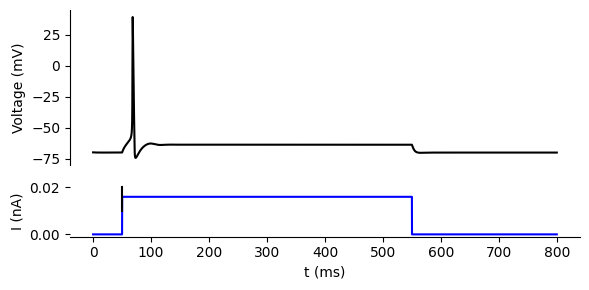

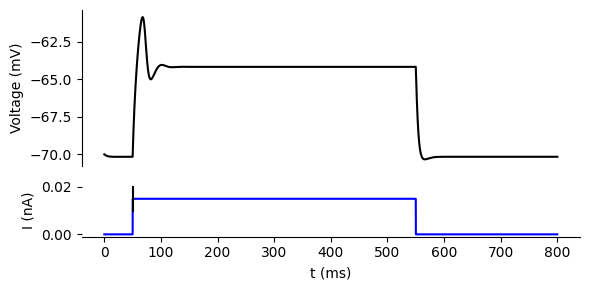

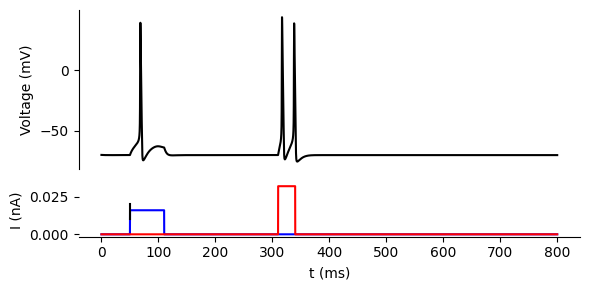

In [13]:
ratio = 2
amplitude_1 = 0.016
amplitude_2 = 0.015
amplitude_3 = amplitude_1 * ratio
dur = 500
dur1 = 60
dur2 = dur1 / ratio
run_exp(amplitude_1, dur, 0, 0, False)
run_exp(amplitude_2, dur, 0, 0, False)
e=run_exp(amplitude_1, dur1, amplitude_3, dur2, True)

100%|██████████| 3/3 [00:00<00:00,  5.84it/s]


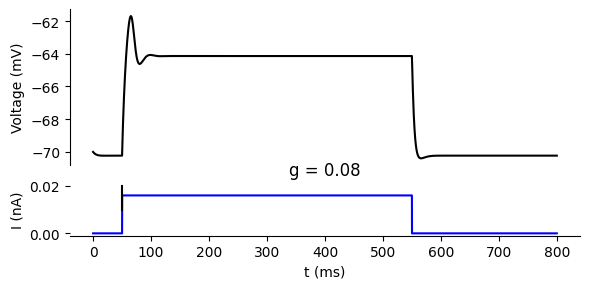

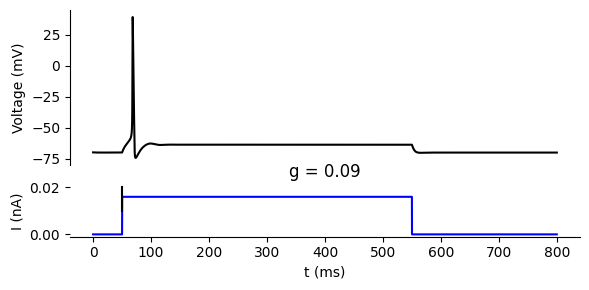

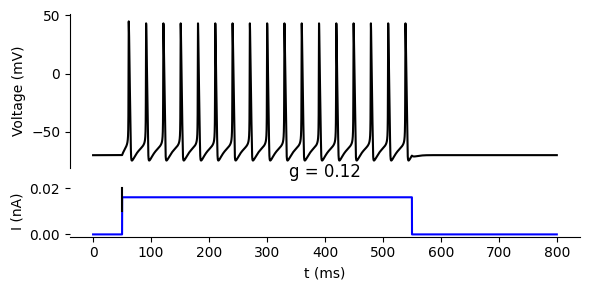

In [14]:
for gna in tqdm([0.08, 0.09, 0.12]):
    run_exp(amplitude_1, dur, 0, 0, False, gna=gna)
    plt.title(f"g = {gna}")